## Homework 4

Use this notebook as a starter

In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import wget
from sklearn.feature_extraction import DictVectorizer

%matplotlib inline

Data:

- https://github.com/gastonstat/CreditScoring
- Also available [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv)

In [3]:
wget.download('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv')

'CreditScoring.csv'

## Preparation 

We'll talk about this dataset in more details in week 6. But for now, use the following code to get started

In [5]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()

In [7]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [9]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   status     4455 non-null   object
 1   seniority  4455 non-null   int64 
 2   home       4455 non-null   object
 3   time       4455 non-null   int64 
 4   age        4455 non-null   int64 
 5   marital    4455 non-null   object
 6   records    4455 non-null   object
 7   job        4455 non-null   object
 8   expenses   4455 non-null   int64 
 9   income     4455 non-null   int64 
 10  assets     4455 non-null   int64 
 11  debt       4455 non-null   int64 
 12  amount     4455 non-null   int64 
 13  price      4455 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 487.4+ KB


Some of the features are encoded as numbers. Use the following code to de-code them:

In [8]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

Prepare the numerical variables:

In [11]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [12]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [15]:
df.status.unique()

array(['ok', 'default'], dtype=object)

In [16]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

## Your code

What are the categorical variables? What are the numerical?

In [19]:
df.columns[df.dtypes=='object']

Index(['home', 'marital', 'records', 'job'], dtype='object')

In [20]:
df.columns[df.dtypes!='object']

Index(['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt',
       'amount', 'price', 'default'],
      dtype='object')

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`

In [21]:
from sklearn.model_selection import train_test_split

In [66]:
full_train, test = train_test_split(df, test_size=0.2, random_state=1)
train, val = train_test_split(full_train, test_size=0.25, random_state=1)

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the "default" variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenses']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [23]:
from sklearn.metrics import roc_auc_score

In [31]:
neg_features = []

for feature in df.columns[df.dtypes!='object']:
    auc = roc_auc_score(train.default, train[feature])
    if auc < 0.5:
        neg_features.append(feature)
    print(feature, auc)

seniority 0.7093778624491943
time 0.5608662489595051
age 0.5732933272499939
expenses 0.5009184217217011
income 0.682006666132633
assets 0.6486042567122802
debt 0.5047829675783548
amount 0.5910773431595518
price 0.5043329862114843
default 1.0


In [67]:
for feature in neg_features:
    train[feature] = -1 * train[feature] 
    val[feature]   = -1 * val[feature] 
    test[feature]  = -1 * test[feature] 

Which numerical variable (among the following 4) has the highest AUC?

- seniority
- time
- income
- debt

## Training the model

From now on, use these columns only:

```
['seniority', 'income', 'assets', 'records', 'job', 'home']
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [30]:
from sklearn.linear_model import LogisticRegression

In [33]:
columns = ['seniority', 'income', 'assets', 'records', 'job', 'home']

X_train, y_train = train[columns], train['default']
X_val, y_val = val[columns], val['default']

In [38]:
clf = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
clf.fit(pd.get_dummies(X_train), y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.512
- 0.612
- 0.712
- 0.812

In [47]:
y_pred = clf.predict_proba(pd.get_dummies(X_val))[:, 1]
round(roc_auc_score(y_val, y_pred), 3)

0.504

In [48]:
round(roc_auc_score(y_val, clf.decision_function(pd.get_dummies(X_val))), 3)

0.504

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

In [44]:
from sklearn.metrics import precision_score, recall_score

In [45]:
thresholds = np.linspace(0, 1, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [49]:
scores = []
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    
    scores.append((t, p, r))

C:\Users\dell\anaconda3\envs\GeoTechDaal\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  del sys.path[0]


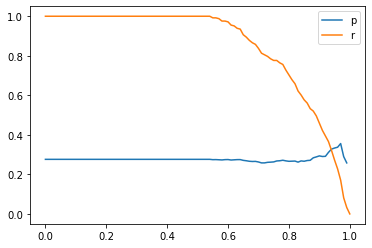

In [55]:
columns = ['threshold', 'p', 'r']
df_scores = pd.DataFrame(scores, columns=columns)

plt.plot(df_scores.threshold, df_scores.p, label='p')
plt.plot(df_scores.threshold, df_scores.r, label='r')
plt.legend()

At which threshold precision and recall curves intersect?

* 0.2
* 0.4
* 0.6
* 0.8

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [58]:
scores = []
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    f1 = (2*p*r)/(p+r)
    
    scores.append(f1)

C:\Users\dell\anaconda3\envs\GeoTechDaal\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  del sys.path[0]


In [62]:
scores

[0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.43271767810026385,
 0.4327176

At which threshold F1 is maximal?

- 0.1
- 0.3
- 0.5
- 0.7

## Question 5


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


In [92]:
from sklearn.model_selection import KFold

In [94]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(full_train):
    df_train = full_train.iloc[train_idx]
    df_val   = full_train.iloc[val_idx]

    y_train = df_train.default.values
    y_val = df_val.default.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

roundnp.std(scores)

0.003619204839386592

How large is standard devidation of the scores across different folds?

- 0.001
- 0.014
- 0.09
- 0.14

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [77]:
columns = ['seniority', 'income', 'assets', 'records', 'job', 'home', 'default']

In [88]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [89]:
def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [90]:
for C in [0.01, 0.1, 1, 10]:
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(full_train):
        df_train = full_train.iloc[train_idx]
        df_val   = full_train.iloc[val_idx]

        y_train = df_train.default.values
        y_val = df_val.default.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

TypeError: 'KFold' object is not callable

Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

## Submit the results

Submit your results here: https://forms.gle/e497sR5iB36mM9Cs5

It's possible that your answers won't match exactly. If it's the case, select the closest one.

## Deadline

The deadline for submitting is 04 October 2021, 17:00 CET. After that, the form will be closed.